In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
import math
from sklearn import metrics
from sklearn.tree import export_graphviz
import IPython, graphviz, re

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    Source from: https://github.com/fastai/fastai/blob/e6b56de53f80d2b2d39037c82d3a23ce72507cd7/old/fastai/structured.py#L22
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

# Decision Tree

![](https://www.xoriant.com/blog/wp-content/uploads/2017/08/Decision-Trees-modified-1.png)

Decision tree models can be used for both classification and regression. The algorithms for building trees breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision (used for regression). The topmost decision node in a tree which corresponds to the best predictor (most important feature) is called a root node. Decision trees can handle both categorical and numerical data.

# Loading the Data

Once again, we’re going to use the Kaggle data: “House Prices: Advanced Regression Techniques”.
It contains 1460 training data points and 80 features that might help us predict the selling price of a
house.

In [11]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [13]:
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df_train['SalePrice']

# Cost Function

Root Mean Squared Error:

$$RMSE =  \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h(x^{(i)}))^2}$$

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt


def rmse(h, y):
    return sqrt(mean_squared_error(h, y))

# Scikit-Learn Decision Tree Algorithm

We are using RandomForestRegressor with 1 estimator, which basically means we’re using a
Decision Tree model. Here is the tree structure of our model:

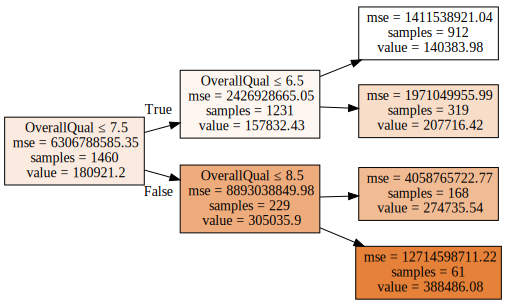

In [16]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, random_state=RANDOM_SEED)
reg.fit(X, y)

draw_tree(reg.estimators_[0], X, precision=2)

### R2 Score

In [21]:
preds = reg.predict(X)
metrics.r2_score(y, preds)

0.6336246655552089

### RMSE

In [22]:
rmse(preds, y)

48069.23940764968

# Building our own Decision Tree Algorithm